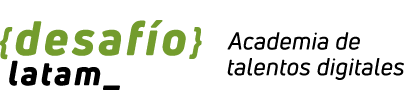

#<center><strong><font color="green">Gráficos con pyhton - Seaborn</font></strong></center>

Veremos a continuación algunos tipos de gráficos con Seaborn. Algunos de ellos ya los hemos utilizado, pero profundizaremos un poco más en algunos comandos específicos.

##<strong><font color="green">Páginas de ayda</font></strong>

La creación de gráficos en Python requiere de muchos comandos que, la mayor parte de las veces, será muy difícil de memorizar. Tampoco es necesario hacerlo y, en ocasiones, bastarpa cn reutilizar ejemplos anteriores o plantillas prediseñadas. Puedes encontrar muchas de ellas en  [python graph gallery](https://python-graph-gallery.com/)

La combinación de colores, y algunos criterios para su uso, pueden no resultar tan intuitivas o naturales si no tenemos competencias específicas de diseño gráfico. Buenas sugerencias de esto se úeden encontrar en [Adobe color](https://color.adobe.com/es/create/color-wheel)

##<strong><font color="green">Gráfico de línea</font></strong>

Nuestro primer tipo de gráfico ya lo hemos utiizado anteriormente. Partiremos por importar las librerías necesarias.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Consideremos una lista de las temperaturas máximas durante una semana. Para ello definiremos dos listas:

In [6]:
# Datos de temperatura durante una semana (en grados Celsius)
dias_semana = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']
temperaturas = [25, 26, 27, 28, 27, 26, 24]

Sin utilizar Seaborn, podemos construir un gráfico de líneas con esots datos. El código correspondiente es bastante sencillo y lo hemos utilizado anteriormente.

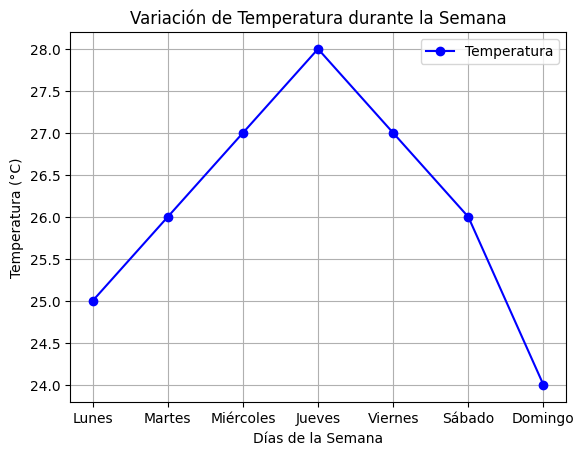

In [3]:
# Crear el gráfico de líneas.
plt.plot(dias_semana, temperaturas, marker='o', linestyle='-', color='b', label='Temperatura')
# Agregar etiquetas y título
plt.xlabel('Días de la Semana')
plt.ylabel('Temperatura (°C)')
plt.title('Variación de Temperatura durante la Semana')
plt.legend()
# Mostrar el gráfico
plt.grid(True)  # Agregar cuadrícula de fondo (opcional)
plt.show()

###Observaciones

*  **plt.plot(dias_semana, temperaturas, marker='o', linestyle='-', color='b', label='Temperatura')** recibe una lista de valores para el eje horizontal (dias_semana), otra para el eje vertical (temperaturas).
*   **marker** nos da las opciones para la forma los puntos, **linestyle** para el tipo de línea y color, lo obvio.

Podemos utilizar Seaborn, que será más práctico para graficar datos provenientes de un dataFrame. Observa que las funciones y formas de cada método se mezclan.

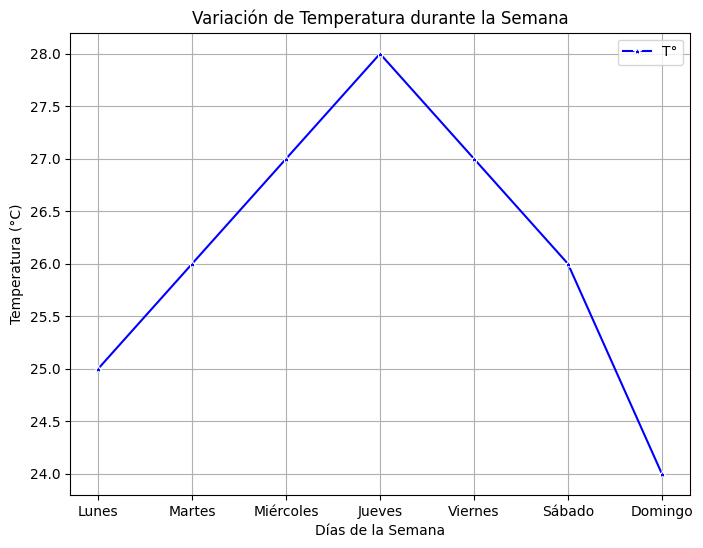

In [ ]:
#creamos un diccionario con los datos, y lo pasamos a un DataFrame
datos = {'dias':dias_semana,'temperatura':temperaturas}
data=pd.DataFrame(datos)

plt.figure(figsize=(8,6))  #configuramos el tamaño de la figura (8 x 6 pulgadas)
sns.lineplot(x='dias', y='temperatura', data=data, marker='*', color='b', linestyle='-',markersize=6,label='T°')
plt.xlabel('Días de la Semana')
plt.ylabel('Temperatura (°C)')
plt.title('Variación de Temperatura durante la Semana')
plt.legend()
# Mostrar el gráfico
plt.grid(True)  # Agregar cuadrícula de fondo (opcional)
plt.show()

###Observaciones

*  Analiza los parámetros de sns.lineplot. ¿Qué diferencias y similitudes encuentras con plt.plot?

##<strong><font color="green">Gráfico de barra</font></strong>

Veremos más tipos de gráficos, utilizando los datos de la base **Breast_cancer_data.csv**.

In [21]:
df=pd.read_csv('/home/martingom04/Data-science/Guis-de-estudio/Apoyo clase - Variable Aleatoria (Parte II)/Breast_cancer_data.csv')
df.head(3)

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.8,1001.0,0.11840,0
1,20.57,17.77,132.9,1326.0,0.08474,0
2,19.69,21.25,130.0,1203.0,0.10960,0


La columna **diagnosis** indica si se trata de un tumor beinigno (0) o maligno (1). Vamos a crear dos columnas, una para cada caso, y calcularemos la media del indicador **mean_perimeter**

In [26]:
grouped_data=df.groupby('diagnosis').mean_perimeter.mean()

In [27]:
grouped_data

diagnosis
0    115.365377
1     78.075406
Name: mean_perimeter, dtype: float64

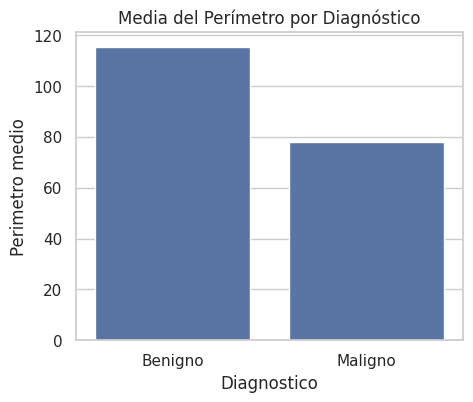

In [28]:


sns.set(style="whitegrid") #otras opciones: darkgrid, dark, white, ticks
plt.figure(figsize=(5, 4))
sns.barplot(x=grouped_data.index, y=grouped_data.values) #podemos acceder de esta manera a los datos
plt.xlabel('Diagnostico')
plt.ylabel('Perimetro medio')
plt.title('Media del Perímetro por Diagnóstico')
custom_labels = ['Benigno', 'Maligno']
plt.xticks(range(len(custom_labels)), custom_labels)
plt.show()



## <strong><font color="green">Scatterplot</font></strong>

Los gráficos de dispersión, también conocidos como gráficos de puntos o **Scatterplot** son una herramienta poderosa para visualizar la relación entre dos variables numéricas. En estos gráficos, cada punto representa un par de valores correspondientes a las dos variables que se están comparando. Son útiles para varios propósitos:

*  Identificar patrones y tendencias.
*  Visualizar la dispersión de los datos.
*  Detectar valores atípicos.
*  Analizar relaciones causa-efecto.
*  Ayudar en la selección de modelos de regresión.


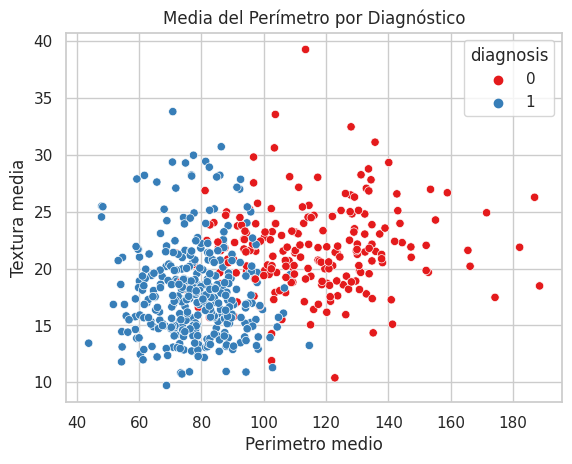

In [ ]:
sns.set(style='whitegrid')
sns.scatterplot(x='mean_perimeter', y='mean_texture', hue='diagnosis', data=df, palette='Set1')
plt.xlabel('Perimetro medio')
plt.ylabel('Textura media')
plt.title('Media del Perímetro por Diagnóstico')
# Mostrar el gráfico
plt.show()

Observa la función **sns.scatterplot()**. Podemos distinguir los sugiientes parámetros:

*  **x='mean_perimeter':** especifica que la columna 'mean_perimeter' del DataFrame df se utilizará para el eje x del gráfico de dispersión.
*  **y='mean_texture':** especifica que la columna 'mean_texture' del DataFrame df se utilizará para el eje y del gráfico de dispersión.
*  **hue='diagnosis':** especifica que la columna 'diagnosis' del DataFrame df se utilizará para colorear los puntos en el gráfico de dispersión según la variable 'diagnosis'.
*  **data=df:** especifica el DataFrame df que contiene los datos para el gráfico de dispersión.
*  **palette='Set1':** especifica la paleta de colores que se utilizará para colorear los puntos. En este caso, se utiliza la paleta 'Set1', que contiene una serie de colores distintos.

El gráfico de dispersión resultante muestra los puntos en un plano cartesiano con 'mean_perimeter' en el eje x, 'mean_texture' en el eje y, y los puntos coloreados según la variable 'diagnosis'. Cada color representará una categoría diferente de 'diagnosis'.

Este tipo de gráfico es útil para visualizar la relación entre dos variables continuas ('mean_perimeter' y 'mean_texture'), y cómo se relacionan con una variable categórica ('diagnosis')

## <strong><font color="green">Histogramas</font></strong>

En este tipo de gráficos los datos se dividen en intervalos o "bins", y se cuenta cuántas veces se observa cada dato dentro de cada intervalo. La altura de las barras del histograma muestra la frecuencia o cantidad de datos que se encuentran en cada intervalo, lo que permite visualizar la distribución de los datos de manera más clara. Seaborn nos ofrece dos funciones: **histplot** para una sola variable y crear un histograma simple, y **distplot** para más complejidad.

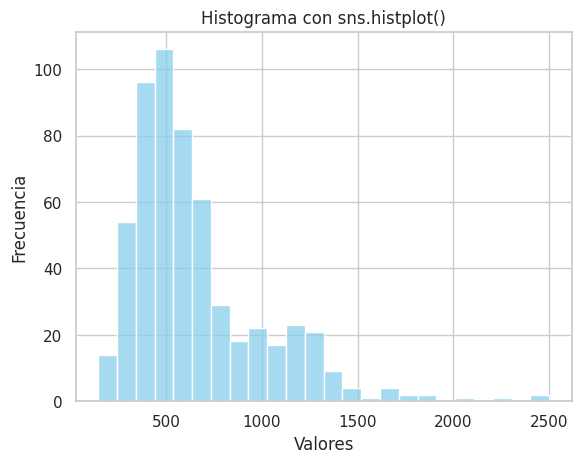

In [33]:
data=df['mean_area']
sns.histplot(data, bins=24, color='skyblue') #observa variando el valor de bins, o simplemente no ponerlos
'''
bins son las cajas es la que las observaremos por ejemplo si usamos 10 las cajas seran mas pequeñas

'''
plt.title('Histograma con sns.histplot()')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.show()

Ahora, utilizando **distplot**

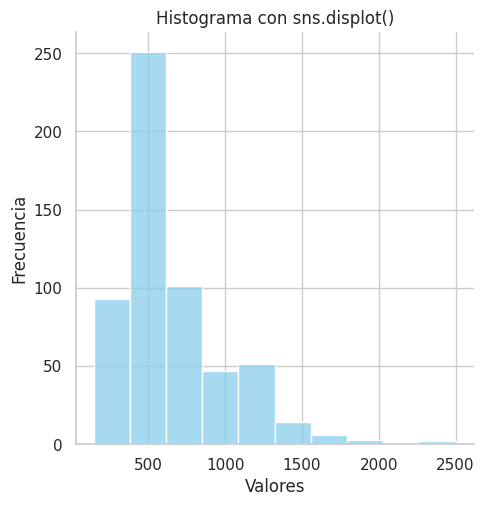

In [ ]:
sns.displot(data, color='skyblue',bins=10)
plt.title('Histograma con sns.displot()')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.show()

¿Por qué usar distplot? Veremos que nos permite utilizar algunos otros parámetros y funcionalidades. Por ejemplo, podemos construir dos histogramas en uno separando por una variable categórica (en nuestro caso, 'diagnosis')

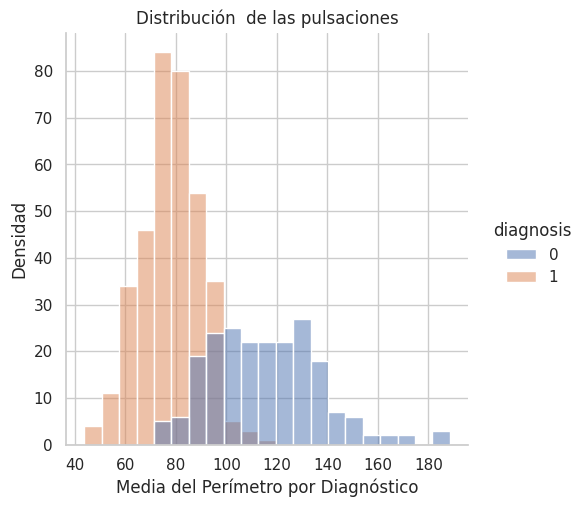

In [ ]:
#creamos primero un objeto
ax = sns.displot(data=df, x='mean_perimeter',  hue='diagnosis', fill=True)
#estamos señalando que, de los datos de "data", grafique los correspondientes a mean_perimeter distinguiendo por el valor de diagnosis

ax.set(xlabel='Media del Perímetro por Diagnóstico',ylabel='Densidad', title='Perímetro v/s densidad')
plt.show()

##<strong><font color="green">Swarmplot</font></strong>

A diferencia del gráfico de dispersión tradicional, que se enfoca en datos numéricos y utiliza una escala continua en los ejes, swarmplot se utiliza para visualizar la distribución de puntos para cada categoría individual en un conjunto de datos categóricos.


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 13.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


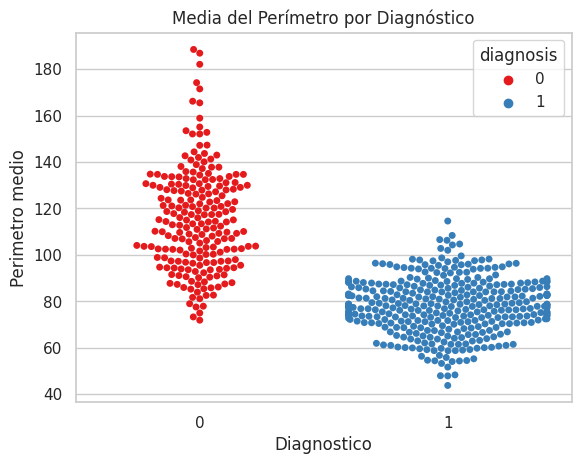

In [ ]:
sns.set(style='whitegrid')
sns.swarmplot(x='diagnosis', y='mean_perimeter', hue='diagnosis', data=df, palette='Set1')
plt.xlabel('Diagnostico')
plt.ylabel('Perimetro medio')
plt.title('Media del Perímetro por Diagnóstico')
# Mostrar el gráfico
plt.show()

##<strong><font color="green">Boxplot</font></strong>

Son una herramienta gráfica utilizada para representar la distribución de un conjunto de datos numéricos y visualizar estadísticas descriptivas importantes. Estos gráficos proporcionan información sobre la mediana, los cuartiles, los valores atípicos y la dispersión de los datos.

Los boxplots son especialmente útiles para:
*  Identificar la simetría o sesgo en la distribución de los datos.
*  Detectar valores atípicos o valores extremos.
*  Comparar la distribución de varios conjuntos de datos.
*  Visualizar la dispersión y concentración de los datos.


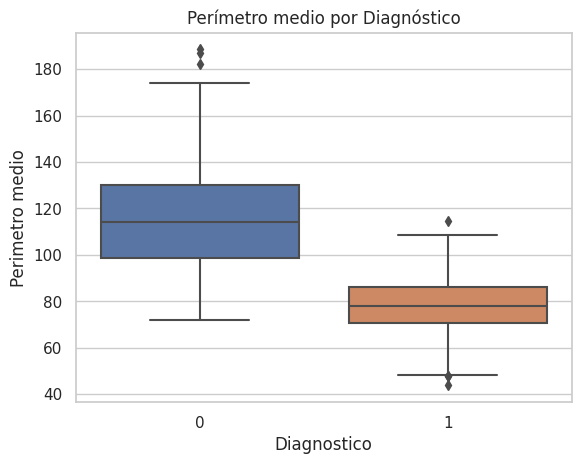

In [ ]:
sns.set(style='whitegrid')
#sns.boxplot(y='mean_perimeter', data=df)
sns.boxplot(x='diagnosis', y='mean_perimeter', data=df)
plt.xlabel('Diagnostico')
plt.ylabel('Perimetro medio')
plt.title('Perímetro medio por Diagnóstico')
plt.show()


*  Compara lo que ocurre si quitas el comentario de la segunda línea, y lo pones en la tercera.
*  ¿Qué ocurre si asignas el valor y a 'diagnosis' y 'x' a 'mean_perimeter'?
*  ¿Qué ocurre con los puntos que quedan más allá de las líneas?

##<strong><font color="green">Pairplot</font></strong>

El paquete Seaborn nos ofrece, finalmente, la posibilidad de crear una cuadrícula de gráficos de dispersión para visualizar las relaciones entre múltiples variables en un conjunto de datos.

El **pairplot** representa las relaciones entre pares de variables numéricas en un conjunto de datos, graficando cada variable contra todas las demás variables. Es especialmente útil para identificar patrones y correlaciones en los datos de manera rápida.

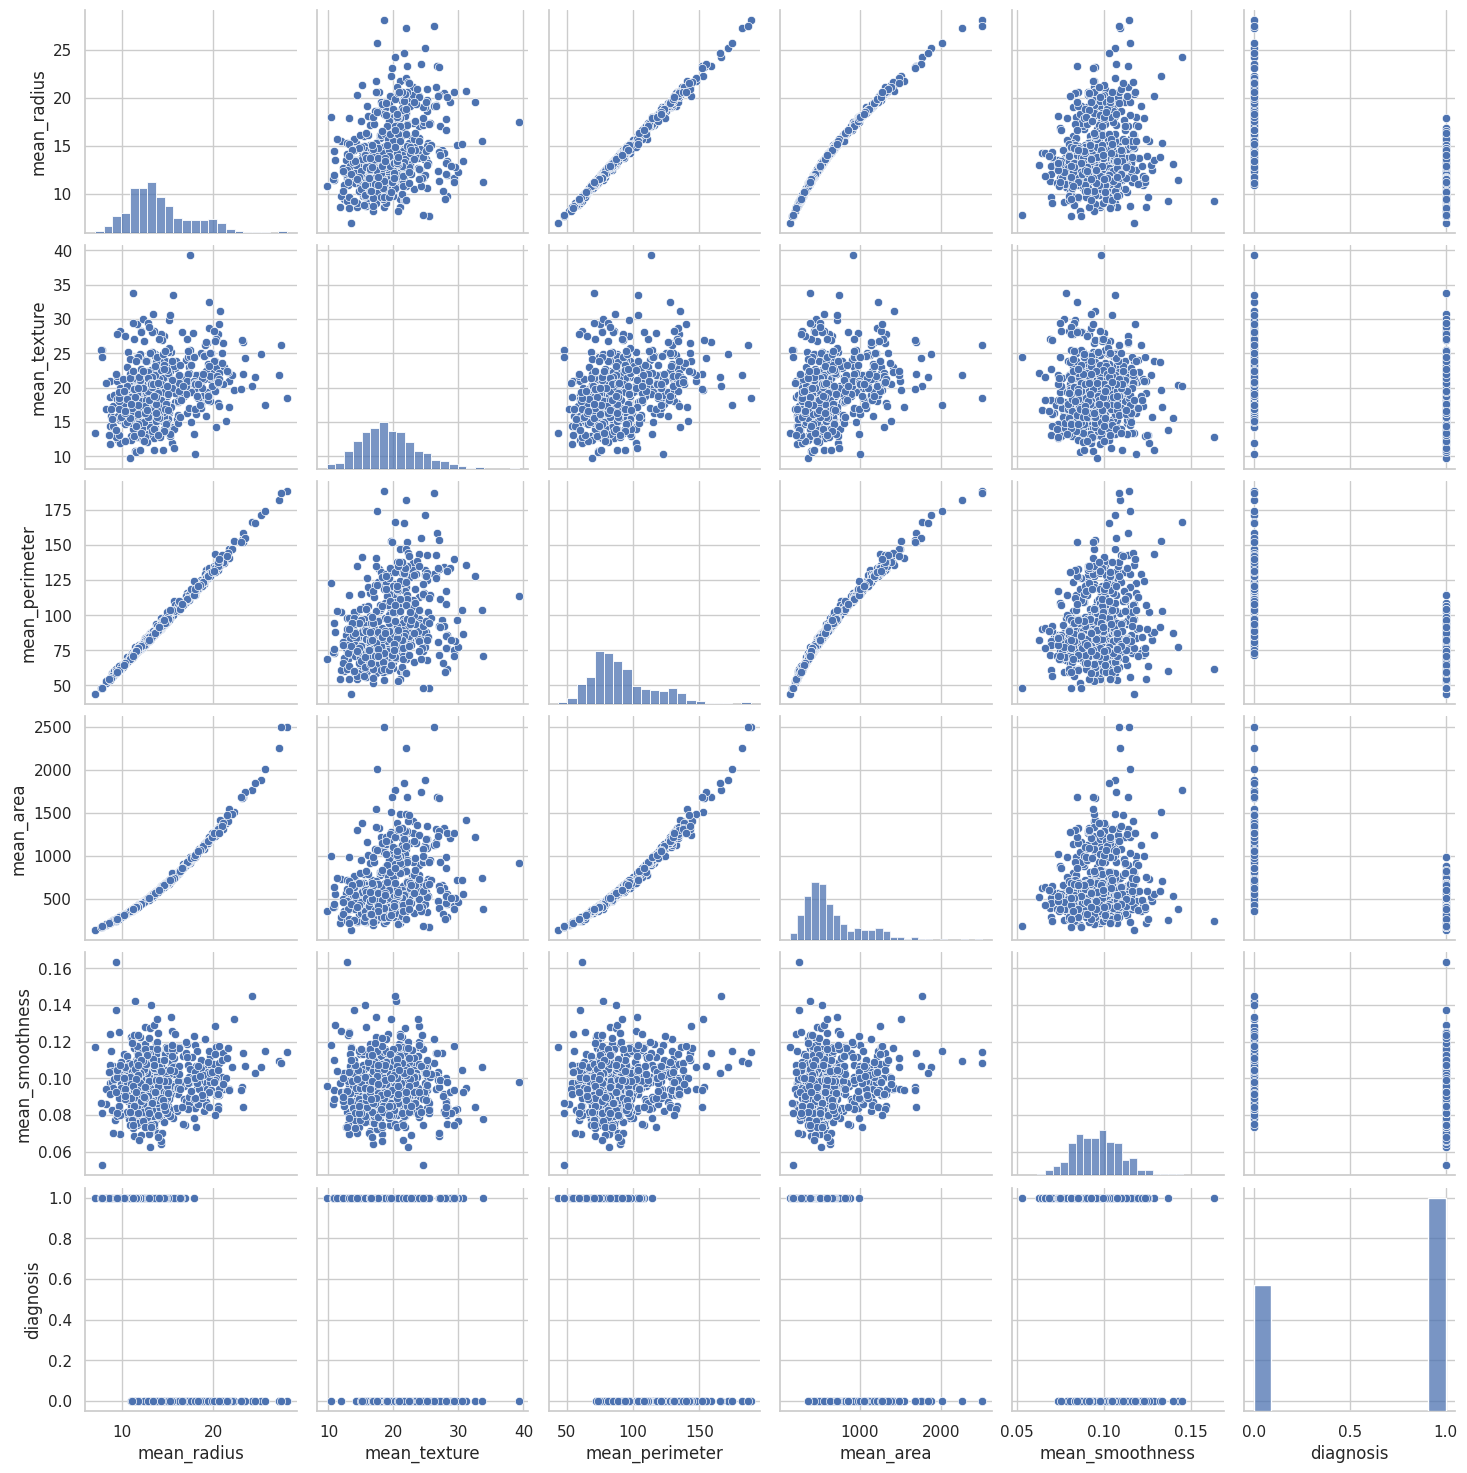

In [ ]:
sns.pairplot(df)

<Axes: >

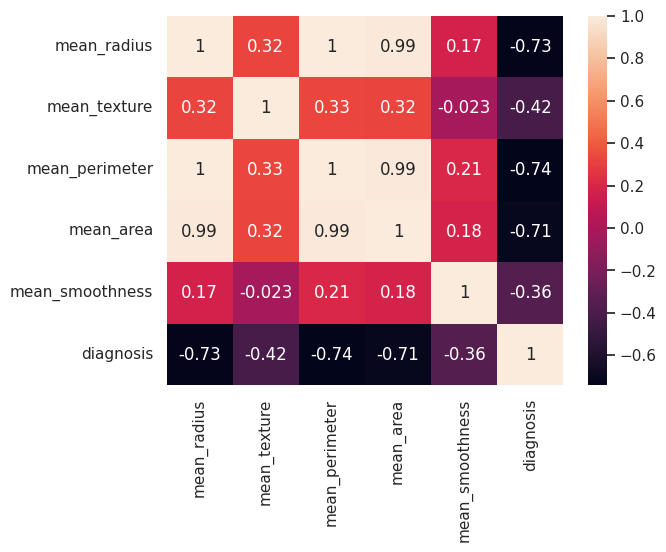

In [34]:
corr = df.corr()
sns.heatmap(corr,annot=True )

Podemos observar que pairplot muestra un diagrama de puntos para cada par de variables cuantitativas del dataset. En la diagonal principal (la que relacionaría cada variable "consigo misma") se incluye un histograma.

En este caso no hemos utilizado parámetros pero podemos incluirlos, por ejemplo, para separar los gráficos por variables cualitativas

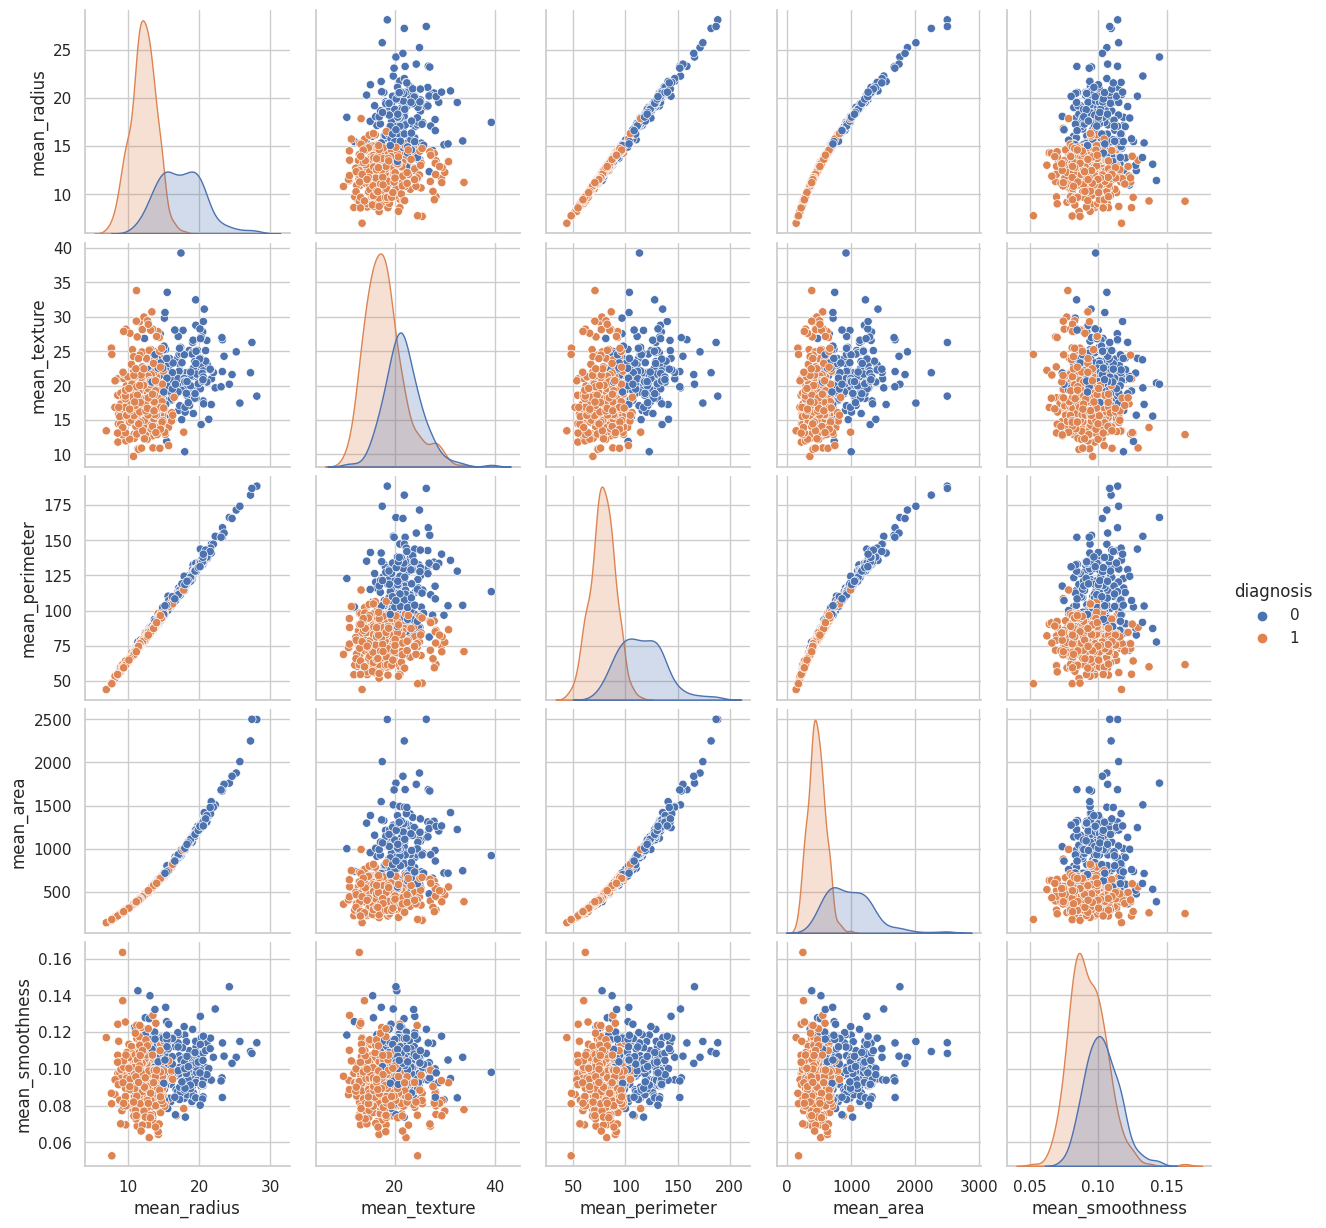

In [ ]:
sns.pairplot(df,hue='diagnosis')
plt.show()

## <strong><font color="green">Subplots</font></strong>

Una utilidad interesante que podemos utilizar con matplotlib es la construcción de subgráficos, y organizarlos en una misma presentación.

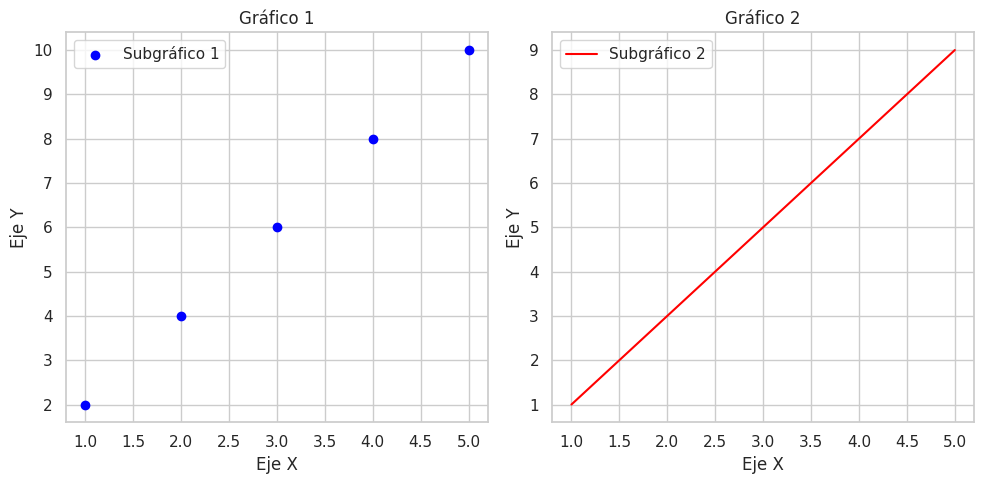

In [ ]:
# Datos para los subgráficos
x = [1, 2, 3, 4, 5]
y1 = [2, 4, 6, 8, 10]
y2 = [1, 3, 5, 7, 9]

# Crear la figura y las subtramas (1 fila, 2 columnas)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Subgráfico 1: Scatter plot
axes[0].scatter(x, y1, c='blue', label='Subgráfico 1')
axes[0].set_xlabel('Eje X')
axes[0].set_ylabel('Eje Y')
axes[0].set_title('Gráfico 1')
axes[0].legend()

# Subgráfico 2: Line plot
axes[1].plot(x, y2, c='red', label='Subgráfico 2')
axes[1].set_xlabel('Eje X')
axes[1].set_ylabel('Eje Y')
axes[1].set_title('Gráfico 2')
axes[1].legend()

# Ajustar el diseño de las subtramas
plt.tight_layout()

# Mostrar el gráfico con los subgráficos
plt.show()
